In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import RecPopular as rp
import itertools

In [2]:
low_user_data = pd.read_csv('data/low_user_data.csv')
low_user_data_idx = low_user_data.set_index('user_id')
low_route_data = low_user_data_idx.T  


In [18]:
route_list = list(low_route_data.index)
rf = rp.batch_process_route_data(route_list)

In [19]:
rf.to_csv('data/route_data.csv',index=False)

In [28]:
rf = pd.read_csv('data/route_data.csv')
len(rf)

3612

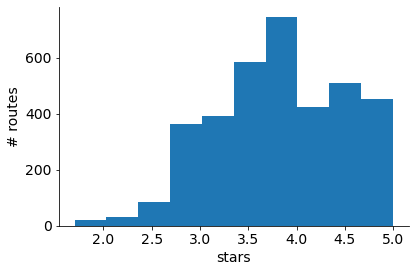

In [21]:
plt.rc('font', size=14)  
ax = rf['stars'].hist()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.set_xlabel('stars')
ax.set_ylabel('# routes')
plt.tight_layout()
plt.savefig('analyze/route_star_freq.png')

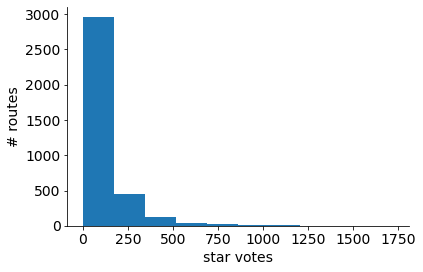

In [22]:
plt.rc('font', size=14)  
ax = rf['starVotes'].hist()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.set_xlabel('star votes')
ax.set_ylabel('# routes')
plt.tight_layout()
plt.savefig('analyze/route_star_vote_freq.png')

In [29]:
raw_types = rf['type'].unique()
raw_rating = rf['rating'].unique()
raw_pitches = rf['pitches'].unique()

In [60]:
##################################################
### CLEAN PITCHES
##################################################

In [30]:
rf['pitches'].unique()


array([ 1.,  6.,  8.,  3., 10.,  4.,  2.,  5., nan,  9.,  7., 11., 13.,
       12., 14., 15., 31., 20., 23., 16., 19., 24.])

In [69]:
rf['clean_pitches'] = rf['pitches']
rf['clean_pitches'][rf['clean_pitches'].isna()] = 1.

In [74]:
rf['clean_pitches'].unique(), len(rf['clean_pitches'])

(array([ 1.,  6.,  8.,  3., 10.,  4.,  2.,  5.,  9.,  7., 11., 13., 12.,
        14., 15., 31., 20., 23., 16., 19., 24.]),
 3612)

In [61]:
##################################################
### CLEAN RATIGNS
##################################################

In [34]:
raw_rating

array(['5.10a', '5.4', '5.7+', '5.9+', '5.9', '5.8', '5.8+', '5.6 R',
       '5.7', '5.11b', '5.9-', '5.5', '5.6', '5.10b/c R', '5.9+ R',
       '5.10c', '5.11a', '5.11c', '5.9- R', '5.8 R', '5.5 R', '5.3 R',
       '5.10b', '5.0', '5.2', '5.11b/c', '5.10-', '5.10d', '5.10b/c',
       '5.11d', '5.12a', '5.3', '5.4 R', '5.4 Easy Snow', '5.10d R',
       '5.2 R', '5.1', '5.12b', '5.11a/b', '5.10c PG13', '5.9 PG13',
       '5.10', '5.11a R', '4th', '5.11+', '5.8+ R', '5.10a/b', '5.10c/d',
       '5.11-', '5.11c PG13', '5.7 PG13', '5.5 PG13', '5.10a/b PG13',
       '5.12-', '5.10- PG13', '5.11d PG13', '5.8 PG13', '5.12d',
       '5.11c/d', '5.11', '5.12c', '5.13a', '5.12a/b PG13', '5.12b/c',
       '5.10+', '5.13a/b', '5.13b', '5.11- R', '5.10c R', 'V7',
       '5.9- PG13', '5.11a X', '5.12a/b', '5.12c/d', '5.11b R',
       '5.11a PG13', '5.7 R', '5.10+ PG13', '5.10a X', '5.10a R', '5.12',
       '5.12a X', '5.11b A1', '5.7 C0', '5.11b PG13', 'V4+', '5.10d PG13',
       '5.12b/c R', 'WI3-4

In [35]:
rating_frame = pd.DataFrame(columns=['raw_rating','s5'], 
    data=np.array([
        list(raw_rating),
        [r.split('5.') for r in raw_rating.astype(str)]
    ]).T)

In [38]:
climb_numerical_ratings = [ "".join(itertools.takewhile(str.isdigit, r)) for r in
    rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )]['s5'].str[-1] ]
rating_frame['climb_rating'] = np.nan
new_ratings = rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )].assign(
    climb_rating=climb_numerical_ratings)
rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )] = new_ratings

In [39]:
boulder_ratings = rating_frame[rating_frame['climb_rating'].isna()]['s5'].str[0].str.split('V')
boulder_ratings_strp = [  "".join(itertools.takewhile(str.isdigit, r)) for r in 
    boulder_ratings[boulder_ratings.apply(lambda r: len(r) == 2)].str[-1]]

In [40]:
bri = [int(brs) if brs != '' else 0 for brs in boulder_ratings_strp]

In [41]:
brf = rating_frame[rating_frame['s5'].str[0].str.split('V').apply(lambda r: len(r) == 2)].assign(climb_rating=bri)
rating_frame[rating_frame['s5'].str[0].str.split('V').apply(lambda r: len(r) == 2)] = brf


In [42]:
import re

In [43]:
res = [ re.search(r'\d+', r) for r in list(rating_frame[rating_frame['climb_rating'].isna()]['raw_rating'].astype(str)) ]

In [44]:
out = []
for r in res:
    if r is None:
        out.append(0)
    else:
        out.append(int(r.group(0)))
out

[4, 3, 5, 0, 5, 3, 4, 4, 4, 13, 3, 2, 5, 4, 2, 3, 5, 4, 0, 4, 6, 5, 5, 4]

In [45]:
remainder = rating_frame[rating_frame['climb_rating'].isna()].assign(climb_rating=out)
rating_frame[rating_frame['climb_rating'].isna()] = remainder

In [46]:
rating_frame['climb_rating'] = rating_frame['climb_rating'].astype(int)

In [47]:
rtf = rating_frame.set_index('raw_rating')
rf['clean_rating'] = rf['rating'].apply(lambda r: rtf.loc[r]['climb_rating'])

In [73]:
rf['clean_rating'].unique(), len(rf['clean_rating'])

(array([10,  4,  7,  9,  8,  6, 11,  5,  3,  0,  2, 12,  1, 13]), 3612)

In [ ]:
##################################################
### CLEAN TYPES
##################################################

In [49]:
raw_types

array(['Sport', 'Trad', 'Trad, TR', 'Sport, TR', 'TR', 'Trad, Sport',
       'Trad, Snow, Alpine', 'Trad, Sport, TR', 'Trad, Alpine', 'Boulder',
       'Sport, Aid', 'Trad, Sport, Aid', 'Trad, TR, Ice',
       'Trad, Mixed, Ice', 'Trad, Aid', 'Snow, Alpine', 'Boulder, Alpine',
       'TR, Boulder, Alpine', 'Trad, Ice', 'Ice', 'TR, Ice',
       'Sport, Alpine', 'Aid', 'Snow', 'Alpine', 'Trad, TR, Aid',
       'Trad, TR, Boulder', 'Sport, Mixed, Ice', 'Sport, Mixed',
       'Trad, Mixed, Ice, Snow, Alpine', 'Trad, Aid, Alpine'],
      dtype=object)

In [110]:
unique_types = np.unique(list(itertools.chain.from_iterable([r.split(', ') for r in raw_types])))
utf = pd.DataFrame(
    data=np.array(
        [unique_types,
        [5,5,2,5,4,5,2,1,3]]
    ).T,
    columns=['types','class']
)
utf = utf.set_index('types')

In [112]:
utf['class'] = utf['class'].astype(int)
utf

,class
types,
Aid,5
Alpine,5
Boulder,2
Ice,5
Mixed,4
Snow,5
Sport,2
TR,1
Trad,3


In [113]:
utf.loc['Aid']['class']

5

In [151]:
type_frame = pd.DataFrame(
    data = np.array(
        [raw_types,
        [r.split(', ') for r in raw_types]]
    ).T,
    columns = ['raw_type','type']
)
type_frame = type_frame.set_index('raw_type')
type_frame['type_ord'] = 0

In [152]:
type_frame['type_ord'] = type_frame['type'].apply(lambda r: [utf.loc[t]['class'] for t in r] ) 
type_frame['mean_type_ord'] = type_frame['type_ord'].apply(lambda r: np.mean(r))

In [158]:
rf['mean_type_ord'] = rf['type'].apply(lambda r: type_frame.loc[r]['mean_type_ord'])


In [160]:
rf['mean_type_ord'].unique(), len(rf['mean_type_ord'])

(array([2.        , 3.        , 1.5       , 1.        , 2.5       ,
        4.33333333, 4.        , 3.5       , 3.33333333, 5.        ,
        2.66666667, 3.66666667, 4.4       ]),
 3612)

In [188]:
rf.to_csv('data/route_data_transform.csv',index=False)

In [57]:
rf = pd.read_csv('data/route_data_transform.csv')

In [58]:
low_user_data = pd.read_csv('data/low_user_data.csv')

In [94]:
low_user_data_idx = low_user_data.set_index('user_id')
low_route_data = low_user_data_idx.T 
low_route_data.index.name = 'route_id'
low_route_data.head()

user_id,200232828,110428885,107111603,106503119,108824777,111864245,107846658,108299845,106999805,106526731,...,108270652,112506923,108939459,111353570,200094340,109924181,105796749,108401191,11802,112233654
route_id,,,,,,,,,,,,,,,,,,,,,
106154984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105759927,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105759879,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105764727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
105883877,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
number_cols = ['id','latitude','longitude','clean_pitches','clean_rating','mean_type_ord']
route_feats = rf[number_cols]
route_feats = route_feats.set_index('id')
route_feats.index.name = 'route_id'
route_feats.head()

,latitude,longitude,clean_pitches,clean_rating,mean_type_ord
route_id,,,,,
105717502,38.5477,-109.5988,1.0,10,2.0
105732407,36.0352,-115.4665,6.0,10,3.0
105748047,39.9878,-105.2918,8.0,4,3.0
105748142,40.1687,-105.3730,3.0,7,3.0
105748214,40.0034,-105.3959,1.0,9,2.0


In [96]:
low_route_data['route_id'] = low_route_data.index.astype(int)
route_feats['route_id'] = route_feats.index.astype(int)

users_and_feats = low_route_data.merge(route_feats)
users_and_feats = users_and_feats.set_index('id')


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [72]:
users_and_feats.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,latitude,longitude,clean_pitches,clean_rating,mean_type_ord
id,,,,,,,,,,,,,,,,,,,,,
106154984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0024,-105.4102,1.0,11,2.0
105759927,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0024,-105.4102,1.0,10,2.5
105759879,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0024,-105.4102,1.0,9,2.0
105764727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.9971,-105.4175,1.0,8,2.5
105883877,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.9984,-105.4164,1.0,8,2.0


In [75]:
nomred_users_and_feats = users_and_feats.astype(float).apply(
    lambda s: (s - s.mean())/(s.max()-s.min()+10e-10))

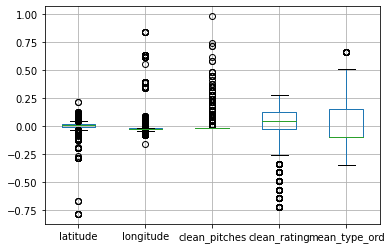

In [83]:
nomred_users_and_feats[route_feats.columns[:-1]].boxplot()


In [86]:
nomred_users_and_feats.index.name = 'route_id'
nomred_users_and_feats.to_csv('data/normed_routes_with_feats.csv')

In [87]:
low_user_data_idx

,106154984,105759927,105759879,105764727,105883877,105764634,105764637,105752287,105752554,105752557,...,106788807,105846876,105799118,111078185,111077772,111176889,111077985,111178496,107384706,106208732
user_id,,,,,,,,,,,,,,,,,,,,,
200232828,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110428885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107111603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106503119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108824777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111864245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107846658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108299845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106999805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
